<h1>Table of Contents<span class="tocSkip"></span></h1><br><br>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Reinforcement-Learning-Task-using-Q-learning" data-toc-modified-id="Basic-Reinforcement-Learning-Task-using-Q-learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Reinforcement Learning Task using Q-learning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Environment" data-toc-modified-id="Environment-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Environment</a></span></li><li><span><a href="#Rewards" data-toc-modified-id="Rewards-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Rewards</a></span></li><li><span><a href="#Q-table" data-toc-modified-id="Q-table-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Q-table</a></span></li><li><span><a href="#Hyper-Parameter" data-toc-modified-id="Hyper-Parameter-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Hyper-Parameter</a></span></li></ul></li><li><span><a href="#Training-the-agent-using-Q-learning-algorithm" data-toc-modified-id="Training-the-agent-using-Q-learning-algorithm-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Training the agent using Q-learning algorithm</a></span><ul class="toc-item"><li><span><a href="#Agent-in-testing-phase" data-toc-modified-id="Agent-in-testing-phase-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Agent in testing phase</a></span></li><li><span><a href="#Comparison--Plot-for-agent-in-training-and-testing-phases" data-toc-modified-id="Comparison--Plot-for-agent-in-training-and-testing-phases-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Comparison  Plot for agent in training and testing phases</a></span></li><li><span><a href="#Policy" data-toc-modified-id="Policy-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Policy</a></span></li></ul></li></ul></li></ul></div>

# Basic Reinforcement Learning Task using Q-learning

### Libraries

In [1]:
import gym
import random
from gym import envs
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
print('libraries imported ...')

libraries imported ...


### Environment

This environemnt was introduced by (Dietterich 2000). It is a classicial problem in OpenGym that illustarted reinforcement learning. We will solve this environment with Q Learning.

Yellow taxi box is the taxi with no customers.
Green taxi box is the taxi when having a customer.
"|" is a wall that the taxi can not go through.
R(ed), G(reen), Y(ellow), B(lue) are the possible pickup and destination locations. 
blue: Current passenger pick up location
purple: Current drop off location

Episode starts with a random start for the taxi and random passenger locations. 
The taxi drives to the pick location and then to the drop off location.
Episode ends with a successfull drop off.

In [2]:
print('Loading Taxi-V3 Environment ...') 
#  loading taxi envirnoment from gym
print('')
environment=gym.make("Taxi-v3")
#  Visualizing the environment)
environment.render()

Loading Taxi-V3 Environment ...

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



### Rewards

In [3]:
print('-01 Reward for each Step in order so agent can find the quickest episode.')
print('-10 Reward for an incorrect pick Up or drop Off a passenger.')
print('+20 Reward on success which is a correct pick up and a correct drop off')

-01 Reward for each Step in order so agent can find the quickest episode.
-10 Reward for an incorrect pick Up or drop Off a passenger.
+20 Reward on success which is a correct pick up and a correct drop off


By creating the taxi environment an intital Reward matrix (P) was created. (Rows (States) * Cols (Actions)).

Below is a sample of the states rewards:

In [4]:
print('P reward at state 100 in Taxi v3 Environment') 
print('--------------------------------------------') 
environment.P[100]

P reward at state 100 in Taxi v3 Environment
--------------------------------------------


{0: [(1.0, 200, -1, False)],
 1: [(1.0, 0, -1, False)],
 2: [(1.0, 120, -1, False)],
 3: [(1.0, 100, -1, False)],
 4: [(1.0, 100, -10, False)],
 5: [(1.0, 100, -10, False)]}

In [5]:
environment.P[499]

{0: [(1.0, 499, -1, False)],
 1: [(1.0, 399, -1, False)],
 2: [(1.0, 499, -1, False)],
 3: [(1.0, 479, -1, False)],
 4: [(1.0, 499, -10, False)],
 5: [(1.0, 499, -10, False)]}

In [6]:
print('Explanation:')
print('--------------------------------------------------------------------------------------------') 
print('             ')
print('The structure for our p matrix is {action: [(probability, nextstate, reward, done)]}.')
print('             ')
print('action:')
print('We have six possible actions:')
print('south   (0)')
print('north   (1)')
print('east    (2)')
print('west    (3)')
print('pickup  (4)')
print('dropoff (5)')
print('             ')
print('probabilty: Taxi V3 environment probability is always 1.')
print('nextstate : The state we would enter if we take the action')
print('reward    : We covered this above')
print('done      : Sucessful eposide completion by dropping off a passenger in the correct location')

Explanation:
--------------------------------------------------------------------------------------------
             
The structure for our p matrix is {action: [(probability, nextstate, reward, done)]}.
             
action:
We have six possible actions:
south   (0)
north   (1)
east    (2)
west    (3)
pickup  (4)
dropoff (5)
             
probabilty: Taxi V3 environment probability is always 1.
nextstate : The state we would enter if we take the action
reward    : We covered this above
done      : Sucessful eposide completion by dropping off a passenger in the correct location


In [7]:
# Full P reward table
print('Full P table (500 states)') 
print('------------------------------------') 
environment.P

Full P table (500 states)
------------------------------------


{0: {0: [(1.0, 100, -1, False)],
  1: [(1.0, 0, -1, False)],
  2: [(1.0, 20, -1, False)],
  3: [(1.0, 0, -1, False)],
  4: [(1.0, 16, -1, False)],
  5: [(1.0, 0, -10, False)]},
 1: {0: [(1.0, 101, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 21, -1, False)],
  3: [(1.0, 1, -1, False)],
  4: [(1.0, 17, -1, False)],
  5: [(1.0, 1, -10, False)]},
 2: {0: [(1.0, 102, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 22, -1, False)],
  3: [(1.0, 2, -1, False)],
  4: [(1.0, 18, -1, False)],
  5: [(1.0, 2, -10, False)]},
 3: {0: [(1.0, 103, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 23, -1, False)],
  3: [(1.0, 3, -1, False)],
  4: [(1.0, 19, -1, False)],
  5: [(1.0, 3, -10, False)]},
 4: {0: [(1.0, 104, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 24, -1, False)],
  3: [(1.0, 4, -1, False)],
  4: [(1.0, 4, -10, False)],
  5: [(1.0, 4, -10, False)]},
 5: {0: [(1.0, 105, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 25, -1, False)],
  3: [(1.0, 5, -1, False)

### Q-table

In [8]:
# From Taxi V3 environment we retreive the action space and state space
# possible actions
# Taxi has 6 actions:  0 = down, 1 = up, 2 = right, 3 = left, 4 = pickup, 5 = dropoff
# Let's confirm this by accessing environemnt action_space
actions=environment.action_space.n
print('------------------------------------') 
print("Total possible actions: ",actions)
# possible states
# Taxi has 5 row × 5 cols × 5 passenger location × 4 destionation = 500 total possible states.
# Let's confirm this by accessing environemnt observation_space
states=environment.observation_space.n
print("Total possible states : ",states)
print('------------------------------------') 

------------------------------------
Total possible actions:  6
Total possible states :  500
------------------------------------


In [9]:
 # Initialize Q Table, each state-action will start with zeroes
qtable1=np.zeros((states,actions))
qtable2=np.zeros((states,actions))
print(qtable1)
print('')
print('------------------------------------') 
print('Q-table initialized ...')
print('------------------------------------') 

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

------------------------------------
Q-table initialized ...
------------------------------------


### Hyper-Parameter

In [10]:
# Hyper-Parameters

totalTrainingEpisodes=2000    # Total episodes for training agent   
totalTestingEpsisodes=2000    # Total Test Episodes
maxSteps=100                  # This is the maximum steps we can have in one epsiode              
alpha=0.75                    # Learning Rate - my rate 0.75
gamma=0.75                    # Discounting Rate - my rate 0.45
epsilon=1                     # Exploration rate. epsilon is between 0 & 1. 0=Full exploition 1=Full exploration
maxEpsilon=0.99               # Maximum exploration probability (This will be set at start of learning)
minEpsilon=0.01               # Minimum exploration probability 
decay=0.005                   # Decay rate for epsilon
print('------------------------------------') 
print('Hyper-Parameters added ...')
print('------------------------------------') 

------------------------------------
Hyper-Parameters added ...
------------------------------------


## Training the agent using Q-learning algorithm

In [11]:
# Training the Agent based on Q-learning and linear decay epsilon


totalTrainRewardPerformance1 = [] # Store all rewards in training stage
totalEpsilonDecayLinear = []


for episode in range(totalTrainingEpisodes):
    state=environment.reset() # Resets the environment
    step=0
    done=False
    currentscore = 0 
    
    for step in range(maxSteps):
        
        # Picking up a random number between 0 and 1
        exploreORexploit=random.uniform(0,1)
        
        # If number above is greater than epsilon, then the agent will exploit using qtable
        if exploreORexploit > epsilon:
            action=np.argmax(qtable1[state,:])
        
        # else a random action in picked up (Exploration)
        else:
            action=environment.action_space.sample()
        
        
        # Extracting new state and reward from action
        newState,reward,done,info=environment.step(action)

        currentscore += reward
            
        # Updating Q-table based on the 1-learning algorithm
        # Q(S,A):= Q(S,A) +  alpha(ɑ) * [R(S,A) +  Gamma(γ) * Max Q(S',A') - Q(S,A)]
        qtable1[state,action]=qtable1[state,action]+alpha*(reward+gamma*np.max(qtable1[newState,:])-qtable1[state,action])
                
        # State is Updated to new state 
        state=newState
          
        # Check if Episode is Finished
        if done==True: 
            break      
     
    # Epsilon greedy decay linearly policy
    if epsilon > minEpsilon:
        epsilon = 1 - episode/918
        epsilon *= (1-decay)
            
    # Increment Episode    
    episode+=1
    
    totalTrainRewardPerformance1.append(currentscore)
    totalEpsilonDecayLinear.append(epsilon)
   
print('--------------------------------------------------------------------') 
print('Training agent finished ...')
print('--------------------------------------------------------------------')
print ("Average reward score per episode *training* : "+str(sum(totalTrainRewardPerformance1)/totalTrainingEpisodes))
print('--------------------------------------------------------------------')
print ("Final Q-table:")
print('--------------------------------------------------------------------')
print(qtable1)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Training agent finished ...
--------------------------------------------------------------------
Average reward score per episode *training* : -58.6755
--------------------------------------------------------------------
Final Q-table:
--------------------------------------------------------------------
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.98699037  -2.65031967  -3.02408883  -2.71323083  -2.19796753
  -11.64900821]
 [ -0.79643949   0.27119443  -0.79638895   0.27148075   1.6953125
   -8.73158592]
 ...
 [ -2.82640855   3.59374905  -1.01505782  -0.93745827  -8.26278157
  -11.75449828]
 [ -2.68106729  -3.12836853  -3.30872435  -1.61927605 -11.62576946
  -11.67623578]
 [  9.49742814   6.02929069   9.45911247  14.           0.49742106
    0.4993185 ]]
--------------------------------------------------------------------


In [12]:
# Training the Agent based on Q-learning and exponential decay epsilon


totalTrainRewardPerformance = [] # Store all rewards in training stage
totalEpsilonDecayExp = []


for episode in range(totalTrainingEpisodes):
    state=environment.reset() # Resets the environment
    step=0
    done=False # done is when 1 episode finishes
    currentscore = 0 
    
    for step in range(maxSteps):
        
        # Picking up a random number between 0 and 1
        exploreORexploit=random.uniform(0,1)
        
        # If number above is greater than epsilon, then the agent will exploit using qtable
        if exploreORexploit > epsilon:
            action=np.argmax(qtable2[state,:])
        
        # else a random action in picked up (Exploration)
        else:
            action=environment.action_space.sample()
        
        # Extracting new state and reward from action
        newState,reward,done,info=environment.step(action)

        currentscore += reward
            
        # Updating Q-table based on the 1-learning algorithm
        # Q(S,A):= Q(S,A) +  alpha(ɑ) * [R(S,A) +  Gamma(γ) * Max Q(S',A') - Q(S,A)]
        qtable2[state,action]=qtable2[state,action]+alpha*(reward+gamma*np.max(qtable2[newState,:])-qtable2[state,action])
                
        # State is Updated to new state 
        state=newState
        
        # Check if Episode is Finished
        if done==True: 
            break  
    
    # Increment Episode    
    episode+=1
    
    totalTrainRewardPerformance.append(currentscore)
    
    
    # Epsilon greedy decay policy based on the exponential 
    epsilon=minEpsilon+(maxEpsilon-minEpsilon)*np.exp(-decay*episode)
    totalEpsilonDecayExp.append(epsilon)

    
print('--------------------------------------------------------------------') 
print('Training agent finished ...')
print('--------------------------------------------------------------------')
print ("Average reward score per episode *training* : "+str(sum(totalTrainRewardPerformance)/totalTrainingEpisodes))
print('--------------------------------------------------------------------')
print ("Final Q-table:")
print('--------------------------------------------------------------------')
print(qtable2)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Training agent finished ...
--------------------------------------------------------------------
Average reward score per episode *training* : -27.038
--------------------------------------------------------------------
Final Q-table:
--------------------------------------------------------------------
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.99766746  -2.79603071  -3.52763653  -3.47471356  -2.19796753
  -11.85756476]
 [ -1.19139004  -0.43515057  -2.78494236  -2.2567749    1.6953125
   -9.90234375]
 ...
 [ -2.67162895  -2.39762878  -2.58362961  -0.45089918 -10.49313354
  -10.9083252 ]
 [ -3.24613914  -3.14893024  -3.1925056   -3.11351544 -11.79745048
  -12.12145156]
 [ -0.9375      -0.9375      -0.9375      13.98555279   0.
   -7.5       ]]
--------------------------------------------------------------------


In [13]:
print('--------------------------------------------------------------------') 
print('Q Values at state 299 ...')
print('--------------------------------------------------------------------')
qtable2[299]

--------------------------------------------------------------------
Q Values at state 299 ...
--------------------------------------------------------------------


array([ 6.04350495,  0.89868142,  3.51517557,  6.125     , -5.40707391,
       -9.375     ])

In [14]:
print('--------------------------------------------------------------------') 
print('Q Values at state 499 ...')
print('--------------------------------------------------------------------')
qtable2[499]

--------------------------------------------------------------------
Q Values at state 499 ...
--------------------------------------------------------------------


array([-0.9375    , -0.9375    , -0.9375    , 13.98555279,  0.        ,
       -7.5       ])

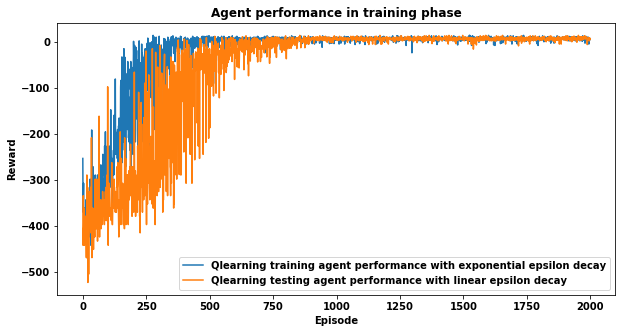

In [15]:
# Agent Performance in training phase plot
fig = plt.figure(figsize=(10,5))
plt.plot(totalTrainRewardPerformance)
plt.plot(totalTrainRewardPerformance1)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Agent performance in training phase')
plt.legend(["Qlearning training agent performance with exponential epsilon decay", "Qlearning testing agent performance with linear epsilon decay "])
plt.show()
# fig.savefig('Agent performance in training phase with different decays.png')

### Agent in testing phase

In [16]:
# Agent test
environment.reset() # Resets the environment
totalTestRewardPerformance = [] # Store all rewards in test stage

for episode in range(totalTestingEpsisodes):
    state=environment.reset()
    step=0
    done=False
    episodesRewards=0

    for step in range(maxSteps):
        environment.render()  # visualizing the environment
        # Agent takes the maximum reward at that state from qtable
        action=np.argmax(qtable2[state,:])
        
        # Extracting new state and reward from the action
        newState,reward,done,info=environment.step(action)
        
        episodesRewards +=reward
        
        # if episode is done then ends
        if done:
            totalTestRewardPerformance.append(episodesRewards)
            print ("Score ",episodesRewards)
            break
        
        # State is Updated to new state 
        state=newState
               
environment.close()

print('-----------------------------------------')
print('-----------------------------------------')
print ("Average reward score per episode *test* ): "+str(sum(totalTestRewardPerformance)/totalTestingEpsisodes))
print('-----------------------------------------')
print('-----------------------------------------')

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R:_| : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |

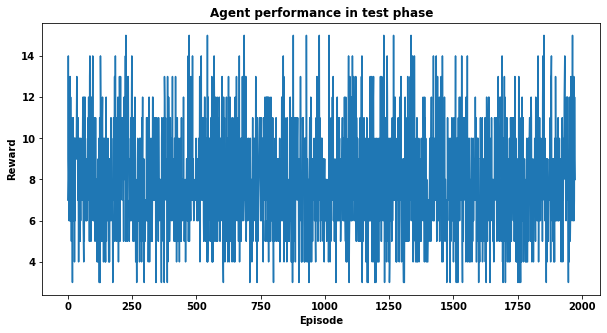

In [17]:
# Agent Performance in test phase plot
fig = plt.figure(figsize=(10,5))
plt.plot(totalTestRewardPerformance)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Agent performance in test phase')
plt.show()
fig.savefig('Agent performance in test phase.png')

### Comparison  Plot for agent in training and testing phases

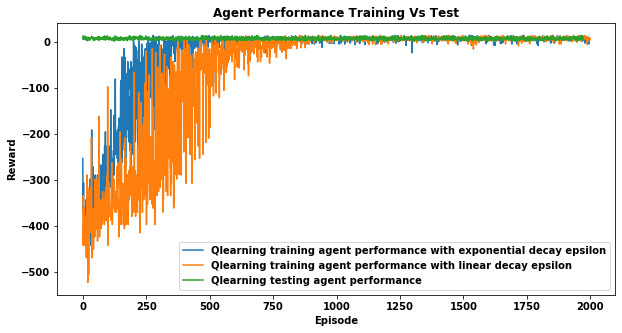

In [18]:
# Agent Performance Training Vs Test plot
fig = plt.figure(figsize=(10,5))
plt.plot(totalTrainRewardPerformance)
plt.plot(totalTrainRewardPerformance1)
plt.plot(totalTestRewardPerformance)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title('Agent Performance Training Vs Test')
plt.legend(["Qlearning training agent performance with exponential decay epsilon", "Qlearning training agent performance with linear decay epsilon", "Qlearning testing agent performance"])
plt.show()
fig.savefig('Agent Performance Training Vs Test.png')

### Policy

Q-learning is an off policy reinforcement learning algorithm that seeks to find the best action to take given the current state. It’s considered off-policy because the q-learning function learns from actions that are outside the current policy, like taking random actions, and therefore a policy isn’t needed. More specifically, q-learning seeks to learn a policy that maximizes the total reward.

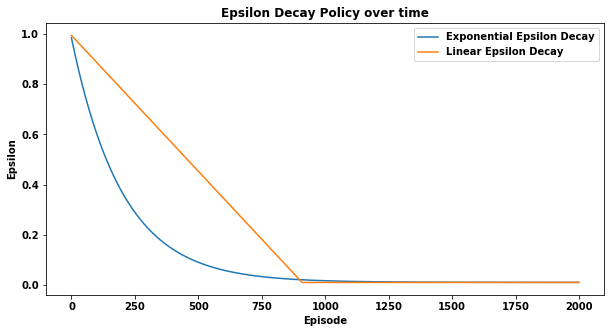

In [19]:
# Agent Performance Training Vs Test plot
fig = plt.figure(figsize=(10,5))
plt.plot(totalEpsilonDecayExp)
plt.plot(totalEpsilonDecayLinear)
plt.title('Epsilon Decay Policy over time')
plt.legend(["Exponential Epsilon Decay", "Linear Epsilon Decay"])
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.show()